In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [7]:
df.sample(5)

,FireplaceQu,GarageQual,SalePrice
1134,TA,TA,169000
531,NaN,TA,128000
941,TA,TA,214000
594,NaN,TA,110000
148,NaN,NaN,141000


# Checking missing null value

In [10]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

# Create x & y

In [13]:
x = df
y = df['SalePrice']

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [17]:
x_train

,FireplaceQu,GarageQual,SalePrice
455,TA,TA,175500
863,NaN,TA,132500
504,Fa,TA,147000
1413,Gd,TA,257000
1389,Gd,TA,131000
...,...,...,...
466,Po,TA,167000
299,Gd,TA,158500
493,Fa,TA,155000
527,Gd,TA,446261


# New column create in Both garage & Fire place

In [23]:
x_train['GarageQual_imputed'] = x_train['GarageQual']
x_test['GarageQual_imputed'] = x_test['GarageQual']
x_train['FireplaceQu_imputed'] = x_train['FireplaceQu']
x_test['FireplaceQu_imputed'] = x_test['FireplaceQu']

In [25]:
x_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
774,Gd,TA,395000,TA,Gd
625,NaN,TA,160000,TA,NaN
1085,NaN,TA,147000,TA,NaN
553,NaN,TA,108000,TA,NaN
698,Gd,TA,138500,TA,Gd


# Replace garage Value & Fireplace imputed

In [38]:
x_train['GarageQual_imputed'][x_train['GarageQual_imputed'].isnull()] = x_train['GarageQual'].dropna().sample(x_train['GarageQual'].isnull().sum()).values

x_test['GarageQual_imputed'][x_test['GarageQual_imputed'].isnull()] = x_train['GarageQual'].dropna().sample(x_test['GarageQual'].isnull().sum()).values
x_train['FireplaceQu_imputed'][x_train['FireplaceQu_imputed'].isnull()] = x_train['FireplaceQu'].dropna().sample(x_train['FireplaceQu'].isnull().sum()).values
x_test['FireplaceQu_imputed'][x_test['FireplaceQu_imputed'].isnull()] = x_train['FireplaceQu'].dropna().sample(x_test['FireplaceQu'].isnull().sum()).values


C:\Users\Naisarg\AppData\Local\Temp\ipykernel_17204\3016800776.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_train['GarageQual_imputed'][x_train['GarageQual_imputed'].isnull()] = x_train['GarageQual'].dropna().sample(x_train['GarageQ

# Review Frequency in Garage Original & Imputed

In [45]:
temp = pd.concat(
[
x_train['GarageQual'].value_counts() / len(x_train['GarageQual'].dropna()),
x_train['GarageQual_imputed'].value_counts() / len(x_train)
],
axis=1)
temp.columns = ['original', 'imputed']
temp


,original,imputed
TA,0.951043,0.950342
Fa,0.037171,0.037671
Gd,0.009973,0.010274
Po,0.000907,0.000856
Ex,0.000907,0.000856


# Review Frequency in Fireplace original & Imputed

In [52]:
temp = pd.concat(
[
x_train['FireplaceQu'].value_counts() / len(x_train['FireplaceQu'].dropna()),
x_train['FireplaceQu_imputed'].value_counts() / len(df)
],
axis=1)
temp.columns = ['original', 'imputed']
temp

,original,imputed
Gd,0.494272,0.395205
TA,0.412439,0.328767
Fa,0.040917,0.032877
Po,0.027823,0.023288
Ex,0.024550,0.019863


# Compare category fireplace before imputation|

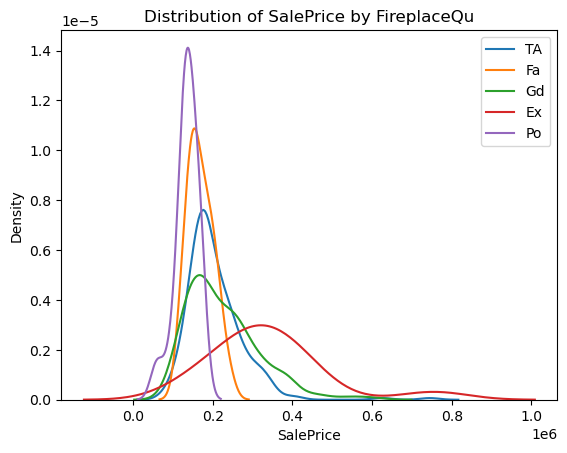

In [75]:

for category in x_train['FireplaceQu'].dropna().unique():
    sns.kdeplot(x_train[x_train['FireplaceQu'] == category]['SalePrice'], label=category)
plt.xlabel('SalePrice')
plt.ylabel('Density')
plt.title('Distribution of SalePrice by FireplaceQu')
plt.legend()
plt.show()

# Compare Category fireplace after imputation

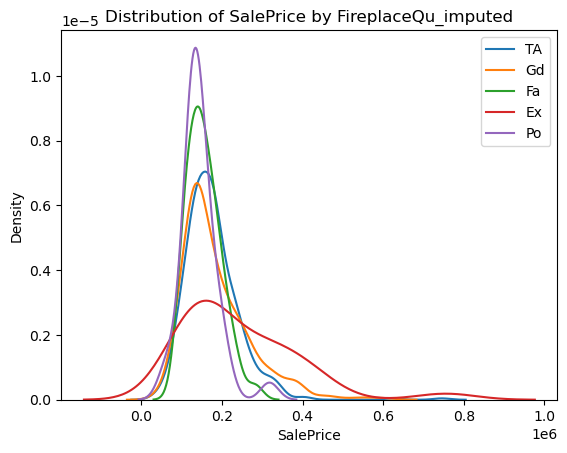

In [80]:
for category in x_train['FireplaceQu_imputed'].dropna().unique():
    sns.kdeplot(x_train[x_train['FireplaceQu_imputed'] == category]['SalePrice'], label=category)

# Add labels and title
plt.xlabel('SalePrice')
plt.ylabel('Density')
plt.title('Distribution of SalePrice by FireplaceQu_imputed')
plt.legend()
plt.show()